#Preparation

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 42.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np

from rdkit import Chem

from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.Lipinski import NumHAcceptors,NumHDonors
from rdkit.Chem.Crippen import MolLogP

In [ ]:
!unzip "./gdrive/MyDrive/PROJECT/KOMPUTASI/V2 MCF7/MCF7.zip"

Archive:  ./gdrive/MyDrive/PROJECT/KOMPUTASI/V2 MCF7/MCF7.zip
  inflating: DOWNLOAD-inSzGKL5HqXC65P3jJ-8uI0HhTM0lVFFkmsP8SpLfHc=.csv  


#Read CSV

In [ ]:
compounds= pd.read_csv("DOWNLOAD-inSzGKL5HqXC65P3jJ-8uI0HhTM0lVFFkmsP8SpLfHc=.csv",sep=";")

<ipython-input-5-3a64611a4b39>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  compounds= pd.read_csv("DOWNLOAD-inSzGKL5HqXC65P3jJ-8uI0HhTM0lVFFkmsP8SpLfHc=.csv",sep=";")


#Data Overview

In [ ]:
compounds.sample(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
44694,CHEMBL3338977,NaN,None,380.4,0,2.43,epi-4a,O=C(/C=C/c1ccccc1)O[C@@H](c1ccccc1)[C@H]1O[C@@...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL3352105,1,Scientific Literature,Eur J Med Chem,2014,CHEMBL3308403,NaN,NaN
1161,CHEMBL1938805,NaN,None,302.17,0,4.19,4,O=C1CC(c2ccc(Br)cc2)Nc2ccccc21,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL1938245,1,Scientific Literature,Bioorg Med Chem Lett,2012,CHEMBL3308403,NaN,NaN
40206,CHEMBL4215199,NaN,None,540.28,None,None,3a,NaN,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL4177721,1,Scientific Literature,Bioorg Med Chem Lett,2018,CHEMBL3308403,NaN,NaN
7584,CHEMBL1173674,NaN,None,412.47,0,2.49,9j,CCOC(=O)c1cc2c(n1C)-c1[nH]c(=O)c(S(=O)(=O)c3cc...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL1177638,1,Scientific Literature,Bioorg Med Chem,2010,CHEMBL3308403,NaN,NaN
32453,CHEMBL4216810,NaN,None,479.49,0,3.71,3a,COC(=O)C(C(=O)OC)C1c2c(ccc(OC)c2OC)-c2ccc3cc4c...,IC50,'=',...,Homo sapiens,CELL-LINE,CHEMBL4190225,1,Scientific Literature,Eur J Med Chem,2017,CHEMBL3308403,NaN,NaN


In [ ]:
compounds.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

In [ ]:
compounds.isna().sum()

Molecule ChEMBL ID                0
Molecule Name                 43354
Molecule Max Phase                0
Molecular Weight                  0
#RO5 Violations                   0
AlogP                             0
Compound Key                      0
Smiles                          101
Standard Type                     0
Standard Relation              1504
Standard Value                 1504
Standard Units                 1427
pChEMBL Value                 14590
Data Validity Comment         46656
Comment                       47407
Uo Units                       1432
Ligand Efficiency BEI         48909
Ligand Efficiency LE          48909
Ligand Efficiency LLE         48909
Ligand Efficiency SEI         48909
Potential Duplicate               0
Assay ChEMBL ID                   0
Assay Description                 0
Assay Type                        0
BAO Format ID                     0
BAO Label                         0
Assay Organism                    0
Assay Tissue ChEMBL ID      

#Cleaning

In [ ]:
#Take necessary column
compounds=compounds[
    ["Molecule ChEMBL ID",
     'Smiles',
     'Standard Type',
     'Standard Relation',
     'Standard Value',
     'Standard Units',]
]

In [ ]:
#Drop NA IC50
compounds = compounds.dropna(subset=["Standard Value","Smiles",])

#Drop Ambiguos Data
compounds = compounds[(compounds["Standard Value"]!=0) & (compounds["Standard Relation"]=="'='")]

#Drop Duplicate Compounds
compounds = compounds.drop_duplicates(subset=["Molecule ChEMBL ID"])


In [ ]:
compounds

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
2,CHEMBL1253582,COC(=O)c1cc2n(c1C)[C@@H](c1ccccc1)SC2,IC50,'=',30600.0,nM
3,CHEMBL1253481,CC(=O)OCc1cccc2c1[C@H](OC(=O)c1ccccc1)[C@H]1C[...,IC50,'=',8310.0,nM
4,CHEMBL403817,COc1cc(-n2c(-c3ccc(Br)cc3)cn(C(C)=O)c2=O)cc(OC...,IC50,'=',10600.0,nM
6,CHEMBL246357,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN1CCOCC1,IC50,'=',17200.0,nM
7,CHEMBL396920,COc1cc(O)c2c(=O)cc(-c3ccccc3Cl)oc2c1CN1CCOCC1,IC50,'=',124400.0,nM
...,...,...,...,...,...,...
48900,CHEMBL5198633,C=C(C)[C@@H]1CC[C@]2(C(=O)OCCCCn3cnc(C)c3)CC[C...,IC50,'=',65600.0,nM
48903,CHEMBL5183884,CC(C)[C@H](NC(=O)c1cc(Cl)ccc1OCCNC(=O)OC(C)(C)...,IC50,'=',11480.0,nM
48905,CHEMBL5220214,O=C(CCn1cc(CCn2nnc3c(Br)c(Br)c(Br)c(Br)c32)nn1)NO,IC50,'=',17270.0,nM
48906,CHEMBL5219332,CNC(=O)COc1ccc(C2=C(C#N)C3N=C4C=CC=CC4N3C(NC(=...,IC50,'=',124000.0,nM


In [ ]:
#Return Units
compounds['Standard Units'].unique()

array(['nM', 'ug.mL-1', '%', nan, 'ug', 'ug/g', "10'6uM", "10'5uM",
       'pmol/L'], dtype=object)

In [ ]:
#Filtering Units
compounds = compounds[(compounds["Standard Units"]=="nM" ) | (compounds["Standard Units"]!="µM") ].reset_index(drop=True)

In [ ]:
#Converting to nM
IC50=[]

for i in range(len(compounds["Smiles"])):
  x = compounds["Standard Value"][i]
  if compounds["Standard Units"][i] != "nM":
    x = x*1000
  IC50.append(x)

In [ ]:
x = {
    "Chembl ID":compounds["Molecule ChEMBL ID"],
    "Smiles":compounds["Smiles"],
    "IC50":IC50
    }
compounds = pd.DataFrame(data=x)
compounds = compounds[compounds["IC50"]>0].reset_index(drop=True)

In [ ]:
compounds.sample(5)

,Chembl ID,Smiles,IC50
4297,CHEMBL4079997,C=C1C(=O)[C@]23[C@H](OC(C)=O)[C@H]1CC[C@H]2[C@...,9410.000
957,CHEMBL4227195,COc1ncc(-c2ccc3ncnc(NCCN(C)C)c3c2)cc1NS(C)(=O)=O,14700.000
24940,CHEMBL3086614,CCCCCCCCCCCCCCCCCCOC(=O)[C@]12CCC(C)(C)C[C@H]1...,123400.000
17714,CHEMBL2037444,C/C(=N/NC(=S)Nc1ccc(F)cc1)c1ccccn1,1.199
1103,CHEMBL2326912,CC1(C)CC(/C=C/c2ccc3ccc4cccc5ccc2c3c45)=[N+]([...,10900.000


#pIC50 Calculation

In [ ]:
import numpy as np
compounds["pIC50"]=-np.log10(compounds["IC50"])
compounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Chembl ID  32412 non-null  object 
 1   Smiles     32412 non-null  object 
 2   IC50       32412 non-null  float64
 3   pIC50      32412 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1013.0+ KB


In [ ]:
compounds.describe()

,IC50,pIC50
count,3.241200e+04,32412.000000
mean,1.263432e+06,-3.644503
std,1.835864e+08,1.123839
min,2.000000e-05,-10.518514
25%,1.650000e+03,-4.374748
50%,7.690000e+03,-3.885926
75%,2.370000e+04,-3.217484
max,3.300000e+10,4.698970


#Labeling

In [ ]:
categories=[]

for x in compounds["pIC50"]:
  if x <-4.36:
    categories.append("inactive")
  elif x< -3.87:
    categories.append("intermediate")
  elif x < -3.24:
    categories.append("active")
  else:
    categories.append("potent")

In [ ]:
compounds["categories"] = categories

In [ ]:
compounds.sample(3)

,Chembl ID,Smiles,IC50,pIC50,categories
12014,CHEMBL4559798,COc1ccc(S(=O)(=O)n2c(-c3cn(-c4ccccc4)nc3-c3ccc...,420.0,-2.623249,potent
9411,CHEMBL129,Cc1cn([C@H]2C[C@H](N=[N+]=[N-])[C@@H](CO)O2)c(...,7670.0,-3.884795,intermediate
14112,CHEMBL4090453,C=C(C)[C@@H]1CC[C@]2(C(=O)O)CC[C@]3(C)[C@H](CC...,7500.0,-3.875061,intermediate


#Lipinski' Rules Filter

In [ ]:
compounds["MolWt"]=[MolWt(Chem.MolFromSmiles(x)) for x in compounds["Smiles"]]
compounds["nHA"]=[NumHAcceptors(Chem.MolFromSmiles(x)) for x in compounds["Smiles"]]
compounds["nHD"]=[NumHDonors(Chem.MolFromSmiles(x)) for x in compounds["Smiles"]]
compounds["MolLogP"]=[MolLogP(Chem.MolFromSmiles(x)) for x in compounds["Smiles"]]

In [ ]:
compounds = compounds[(compounds["MolWt"]<500)&(compounds["MolLogP"]<5)&(compounds["nHA"]<10)&(compounds["nHD"]<5)].reset_index(drop=True)

In [ ]:
compounds.columns

Index(['Chembl ID', 'Smiles', 'IC50', 'pIC50', 'categories', 'MolWt', 'nHA',
       'nHD', 'MolLogP'],
      dtype='object')

#Final Dataset

In [ ]:
df = compounds[['Chembl ID', 'Smiles', 'IC50', 'pIC50']].copy()

In [ ]:
df.to_csv("./gdrive/MyDrive/PROJECT/KOMPUTASI/V2 MCF7/EDA_dataset.csv",sep=";", index=False)

In [ ]:
df

,Chembl ID,Smiles,IC50,pIC50
0,CHEMBL1253582,COC(=O)c1cc2n(c1C)[C@@H](c1ccccc1)SC2,30600.0,-4.485721
1,CHEMBL403817,COc1cc(-n2c(-c3ccc(Br)cc3)cn(C(C)=O)c2=O)cc(OC...,10600.0,-4.025306
2,CHEMBL246357,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN1CCOCC1,17200.0,-4.235528
3,CHEMBL396920,COc1cc(O)c2c(=O)cc(-c3ccccc3Cl)oc2c1CN1CCOCC1,124400.0,-5.094820
4,CHEMBL246967,COc1cc(OC)c(C(=O)/C=C/c2ccccc2Cl)c(O)c1CN(C)CC...,5100.0,-3.707570
...,...,...,...,...
15786,CHEMBL477929,CC1(C)CCC[C@]2(C)[C@H]3C[C@@H](O)[C@]4(C)[C@H]...,3300.0,-3.518514
15787,CHEMBL3960662,CN(C)CCCOc1ccc(-c2ccc3ncc4c(c3c2)n(C2CCOCC2)c(...,600.0,-2.778151
15788,CHEMBL5219306,CC(=O)c1ccc(Nc2c(C(C)=O)sc(N)c2C#N)cc1,91460.0,-4.961231
15789,CHEMBL5188567,C=C(c1cc(OC)c(OC)c(OC)c1)c1ccc(OC)cc1NC(=O)CNC,240.0,-2.380211


In [ ]:
compounds.to_csv("/content/gdrive/MyDrive/PROJECT/KOMPUTASI/V2 MCF7/ML_dataset.csv",sep=";", index=False)

#RdKit Descriptors

In [ ]:
mols = [Chem.MolFromSmiles(x) for x in df["Smiles"]]

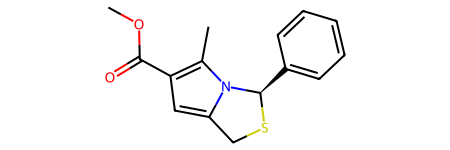

In [ ]:
mols[0]

In [ ]:
descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]

In [ ]:
desc_df = pd.DataFrame(descrs)
desc_df.to_csv("./gdrive/MyDrive/PROJECT/KOMPUTASI/V2 MCF7/desc_EDA.csv",sep=";", index=False)

In [ ]:
desc_df.sample(5)

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
7903,12.697363,12.697363,0.203465,-0.502732,0.405109,15.333333,323.348,306.212,323.115758,122,...,0,0,0,0,0,0,0,0,1,0
12998,12.198128,12.198128,0.009028,0.009028,0.364134,36.941176,234.339,212.163,234.161980,94,...,0,0,0,0,0,0,0,0,0,0
6759,11.024467,11.024467,0.289902,-0.376926,0.223832,10.633333,475.343,452.159,474.090267,158,...,0,0,0,0,0,0,0,0,3,0
10669,12.230130,12.230130,0.004794,-0.421834,0.494335,11.166667,307.099,300.043,305.952771,90,...,0,0,0,0,0,0,0,0,0,0
9443,12.250384,12.250384,0.236708,-0.236708,0.398322,11.064516,419.477,394.277,419.173273,160,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
 df.columns

Index(['Chembl ID', 'Smiles', 'IC50', 'pIC50'], dtype='object')